🎯 Objective: Predict whether a person survived or not (Binary Classification)
📦 Dataset: Titanic Dataset from Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('train.csv')  # Titanic training dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

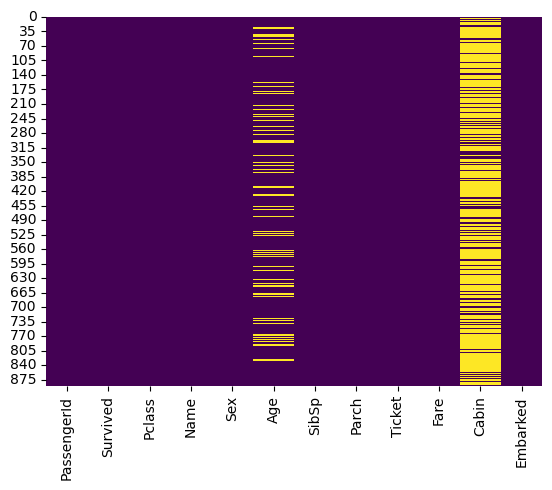

In [3]:
# Display basic information about the dataset
# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [4]:
df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_18172\3928740685.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_18172\3928740685.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [5]:
# Drop the 'Cabin' column due to high number of missing values
df.drop(columns=['Cabin'],axis=1, inplace=True)
#Drop unnecessary columns
df.drop(columns=['PassengerId', 'Name', 'Ticket'],axis=1, inplace=True)

In [6]:
#but best use using pipeline like categories -> oneHotEncoder -> columnTransformer -> LogisticRegression

# Categorical Data Encoding (One-Hot Encoding) using pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Define categorical features
categorical_features = ['Sex', 'Embarked']

# Create a ColumnTransformer to apply OneHotEncoder to categorical features
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Create a pipeline with the ColumnTransformer and Logistic Regression
#Create Model Pipeline
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('classifier', LogisticRegression())
])  

 #Train/Test Split

from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")



print(confusion_matrix(y_test, y_pred))
# # Feature Importance (Logistic Regression Coefficients)
# importance = pipeline.named_steps['classifier'].coef_[0]
# feature_names = X_train.columns.tolist()
# importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})






Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
[[89 16]
 [20 54]]


d:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
#check overfiting
#test vs train accuracy
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)
print(f'Train Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')
# Check for overfitting
if train_accuracy > test_accuracy:
    print("Model may be overfitting.")  
else:
    print("Model is not overfitting.")


Train Accuracy: 0.80
Test Accuracy: 0.80
Model may be overfitting.


In [8]:
import joblib
# Save the trained pipeline
joblib.dump(pipeline, 'pipeline_1.pkl')
    

['pipeline_1.pkl']